Lambda School Data Science

*Unit 2, Sprint 1, Module 3*

---

In [192]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [193]:
def note(text):
  print(f'\033[38;2;125;125;225m{text}\033[00m')

def warn(text):
  print(f'\033[38;2;255;50;50m{text}\033[00m')

# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model. 

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [194]:
import pandas as pd

def wrangle(filepath):
    # Fucntion
    def numTime(string):
      # new = string.strip('$').strip().strip('-').replace(',', '')
      new = string.strip('$ -').replace(',', '')
      return int(new)


    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',  
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath, usecols=cols, parse_dates=['SALE DATE'], index_col='SALE DATE')

    df['SALE PRICE'] = df['SALE PRICE'].apply(numTime)
    df['BOROUGH'] = df['BOROUGH'].astype('int')
    df = df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']
    df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 2000000)]

    return df

filepath = DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv'

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [195]:
df = wrangle(filepath)
print(df.dtypes)
df
# df['SALE PRICE'].value_counts()

BOROUGH                      int64
NEIGHBORHOOD                object
BUILDING CLASS CATEGORY     object
GROSS SQUARE FEET          float64
YEAR BUILT                 float64
SALE PRICE                   int64
dtype: object


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,,,
2019-01-01,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1325.0,1930.0,550000
2019-01-01,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,2001.0,1940.0,200000
2019-01-02,2,PELHAM PARKWAY SOUTH,01 ONE FAMILY DWELLINGS,2043.0,1925.0,810000
2019-01-02,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,2680.0,1899.0,125000
2019-01-02,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1872.0,1940.0,620000
...,...,...,...,...,...,...
2019-04-30,4,ROSEDALE,01 ONE FAMILY DWELLINGS,1478.0,1925.0,635000
2019-04-30,4,SOUTH OZONE PARK,01 ONE FAMILY DWELLINGS,1280.0,1930.0,514000
2019-04-30,4,SOUTH OZONE PARK,01 ONE FAMILY DWELLINGS,1333.0,1945.0,635000


**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [196]:
# Perform your exploratory data analysis here and
# modify the wrangle function above

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [197]:
target = 'SALE PRICE'
X = df.drop(columns=[target])
y = df[target]

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019. 
- Your test set should include data from April 2019.

In [198]:
cutoff = '2019-04-01'
mask = X.index < cutoff
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [199]:
from sklearn.metrics import mean_absolute_error

y_pred = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 214721.52773001452


# IV. Build Model 

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [200]:
from category_encoders import OneHotEncoder
ohe = OneHotEncoder(use_cat_names=True)
ohe.fit(X_train)

XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [201]:
from sklearn.linear_model import LinearRegression, Ridge
model_lr = LinearRegression()
model_lr.fit(XT_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [202]:
model_r = Ridge()
model_r.fit(XT_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [203]:
training_mae_lr = mean_absolute_error(y_train, model_lr.predict(XT_train))
test_mae_lr = mean_absolute_error(y_test, model_lr.predict(XT_test))

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)

Linear Training MAE: 124775.58464638465
Linear Test MAE: 139694.1601764166


**Task 10:** Check the training and test metrics for `model_r`.

In [204]:
training_mae_r = mean_absolute_error(y_train, model_r.predict(XT_train))
test_mae_r = mean_absolute_error(y_test, model_r.predict(XT_test))

print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)

Ridge Training MAE: 126654.31282586556
Ridge Test MAE: 137854.28488585705


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [211]:
# Caculate R^2 score
print('Training R^2 Score:', model_r.score(XT_train, y_train))
print('Training R^2 Score:', model_r.score(XT_test, y_test))

Training R^2 Score: 0.6154212352767916
Training R^2 Score: 0.495605603303823


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

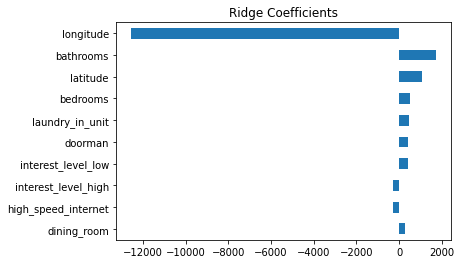

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

In [227]:
import matplotlib.pyplot as plt

coef_lr = model_lr.coef_
features = ohe.get_feature_names()
feature_importance = pd.Series(coef_lr,index=features).sort_values(key=abs)
feature_importance


BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS    2.910383e-11
GROSS SQUARE FEET                                  1.621648e+02
NEIGHBORHOOD_FLATBUSH-CENTRAL                     -2.889888e+02
YEAR BUILT                                         5.866779e+02
NEIGHBORHOOD_WOODHAVEN                            -1.712643e+03
                                                       ...     
NEIGHBORHOOD_MOUNT HOPE/MOUNT EDEN                -8.979444e+05
NEIGHBORHOOD_INWOOD                               -9.018237e+05
NEIGHBORHOOD_KINGSBRIDGE HTS/UNIV HTS             -9.453475e+05
NEIGHBORHOOD_WILLIAMSBRIDGE                       -9.537594e+05
NEIGHBORHOOD_EAST TREMONT                         -9.799930e+05
Length: 180, dtype: float64

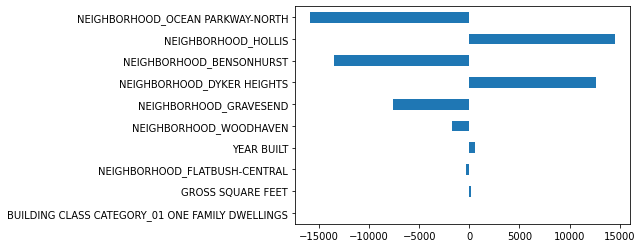

bad graph


In [228]:

feature_importance.head(10).plot(kind='barh')
plt.show()

warn('bad graph')

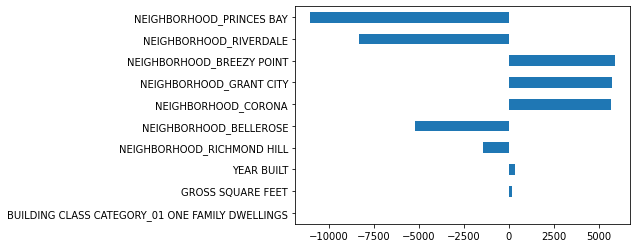

bad graph


In [229]:
coef_r = model_r.coef_
features = ohe.get_feature_names()
feature_importance_r = pd.Series(coef_r,index=features).sort_values(key=abs)
# feature_importance_r

feature_importance_r.head(10).plot(kind='barh')
plt.show()

warn('bad graph')